<a href="https://colab.research.google.com/github/raihanewubd/CSE457/blob/main/CSE_475_lab_5b_yolov11_object_detection_xai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="v2OeVdV2nRcS1529u27E")
project = rf.workspace("murad044").project("cse475__lab_4__task")
version = project.version(1)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to CSE475__LAB_4__TASK-1 in yolov11:: 100%|██████████| 24770/24770 [00:10<00:00, 2358.37it/s]


In [ ]:
from IPython import display
display.clear_output()

%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.5/112.6 GB disk)


In [ ]:
!yolo task=detect mode=train model=yolo11s.pt data=/content/CSE475__LAB_4__TASK-1/data.yaml epochs=10 imgsz=640 plots=True

100% 18.4M/18.4M [00:00<00:00, 200MB/s]
Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/CSE475__LAB_4__TASK-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cr

Displaying image: /content/runs/detect/train/train_batch2.jpg


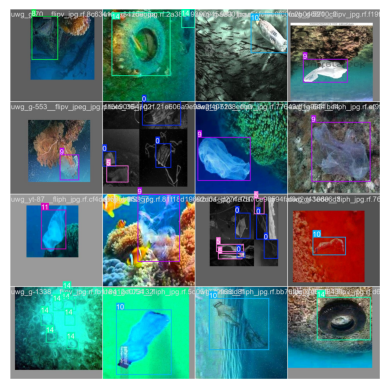

Displaying image: /content/runs/detect/train/labels_correlogram.jpg


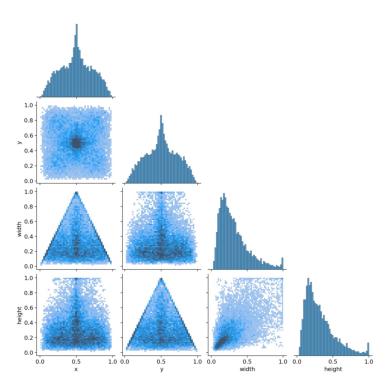

Displaying image: /content/runs/detect/train/val_batch0_pred.jpg


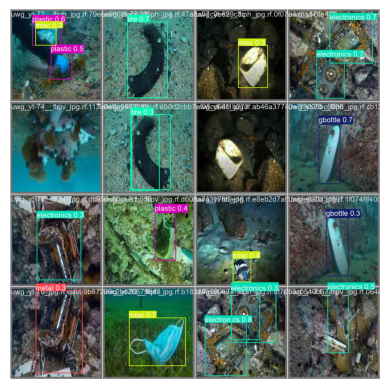

Displaying image: /content/runs/detect/train/val_batch2_pred.jpg


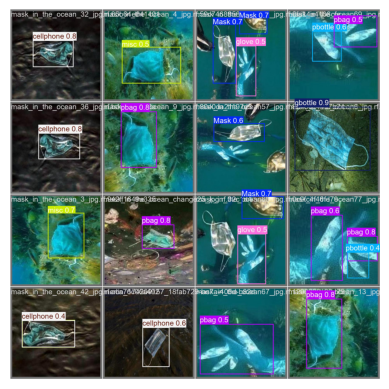

Displaying image: /content/runs/detect/train/train_batch0.jpg


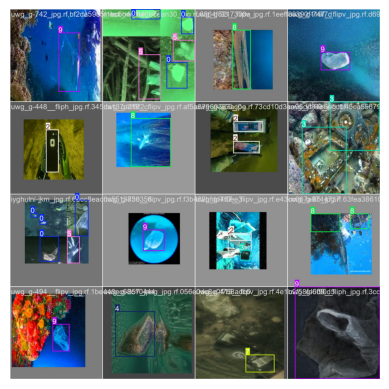

Displaying image: /content/runs/detect/train/train_batch1.jpg


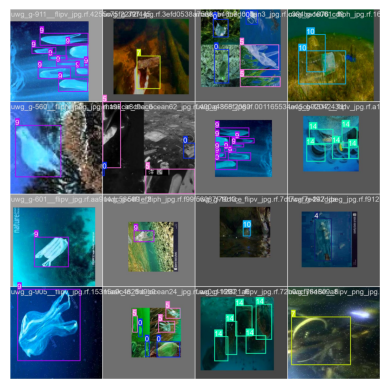

Displaying image: /content/runs/detect/train/labels.jpg


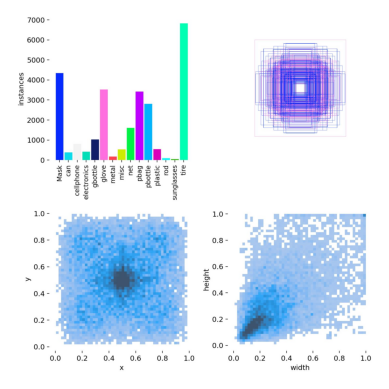

Displaying image: /content/runs/detect/train/val_batch2_labels.jpg


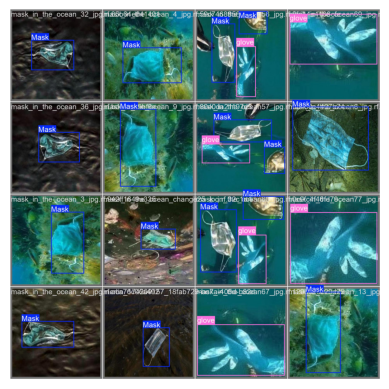

Displaying image: /content/runs/detect/train/val_batch1_pred.jpg


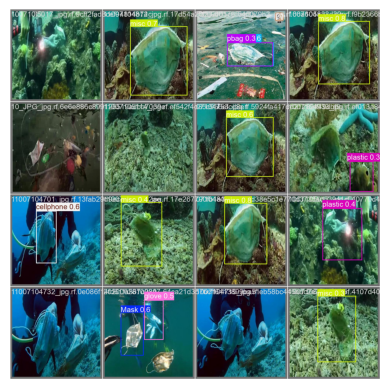

Displaying image: /content/runs/detect/train/val_batch1_labels.jpg


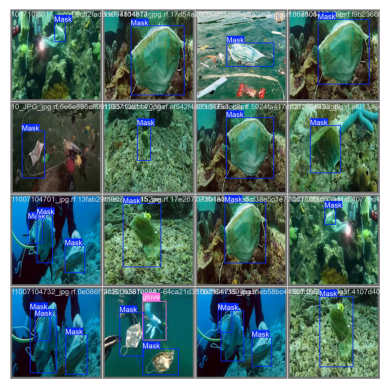

Displaying image: /content/runs/detect/train/val_batch0_labels.jpg


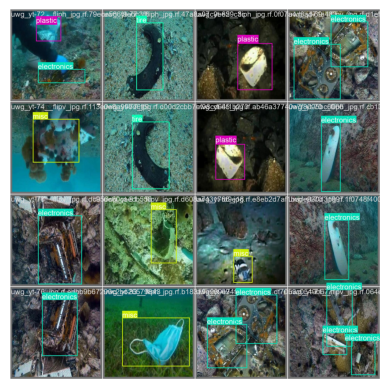

Displaying image: /content/runs/detect/train/confusion_matrix_normalized.png


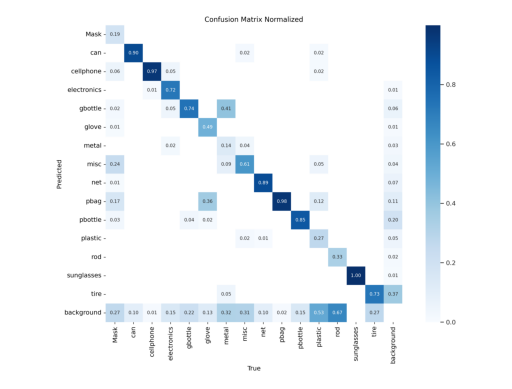

Displaying image: /content/runs/detect/train/R_curve.png


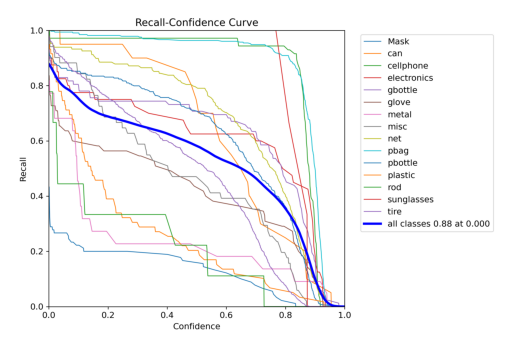

Displaying image: /content/runs/detect/train/PR_curve.png


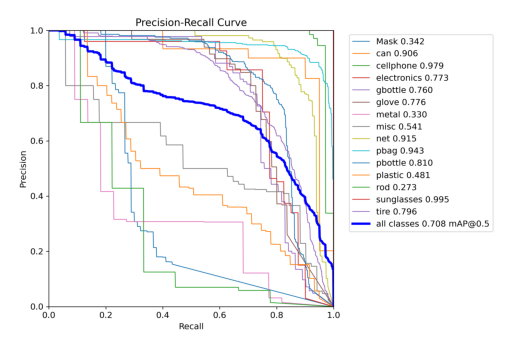

Displaying image: /content/runs/detect/train/confusion_matrix.png


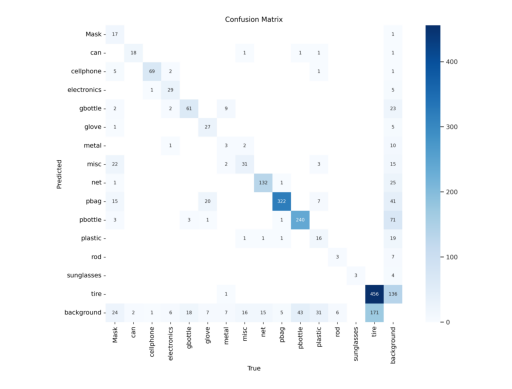

Displaying image: /content/runs/detect/train/F1_curve.png


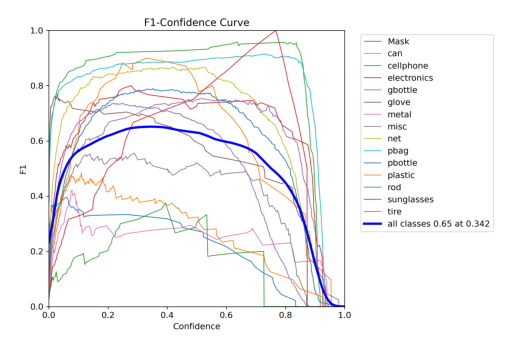

Displaying image: /content/runs/detect/train/P_curve.png


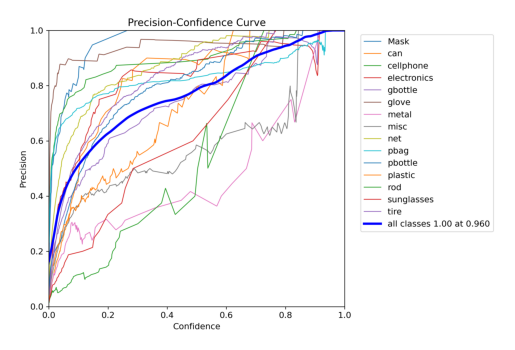

Displaying image: /content/runs/detect/train/results.png


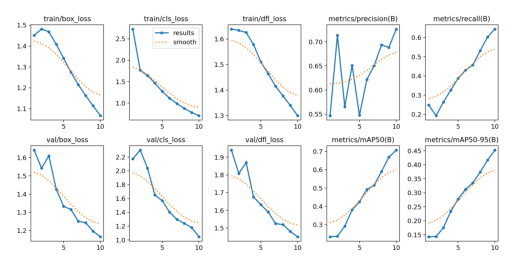

In [ ]:
import os
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the directory
directory = '/content/runs/detect/train'  # Update the path if necessary

# Get a list of all .jpg and .png files in the directory and subdirectories
image_files = glob(os.path.join(directory, '**', '*.jpg'), recursive=True) + \
              glob(os.path.join(directory, '**', '*.png'), recursive=True)

# Iterate through the list of image files and display each one
for image_path in image_files:
    print(f"Displaying image: {image_path}")

    # Read the image
    img = mpimg.imread(image_path)

    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Hide the axis
    plt.show()

In [ ]:
# from ultralytics import YOLO

# # Path to the yolov11s.pt file
# model = YOLO("yolo11s.pt")  # Load the model from the .pt file

# # Optionally check the model architecture
# print(model)

FileNotFoundError: [Errno 2] No such file or directory: 'yolov11s.pt'

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/CSE475__LAB_4__TASK-1/data.yaml

Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,418,605 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/CSE475__LAB_4__TASK-1/valid/labels.cache... 1000 images, 0 backgrounds, 0 corrupt: 100% 1000/1000 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 63/63 [00:13<00:00,  4.54it/s]
                   all       1000       1891      0.727      0.644      0.708      0.451
                  Mask         77         90          1      0.193      0.342      0.249
                   can         18         20      0.899      0.893      0.906      0.366
             cellphone         61         71       0.88      0.972      0.979      0.865
           electronics         27         40      0.848      0.698      0.773      0.466
               gbottle         36         82      0.707      0.744       0.76      0.545
                 glove         37   

Displaying image: /content/runs/detect/val/val_batch0_pred.jpg


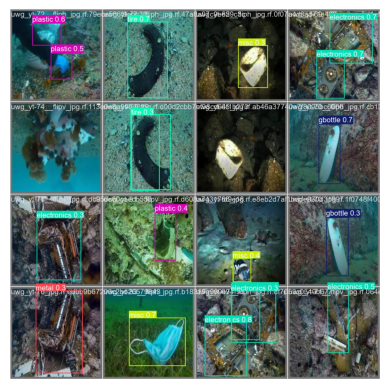

Displaying image: /content/runs/detect/val/val_batch2_pred.jpg


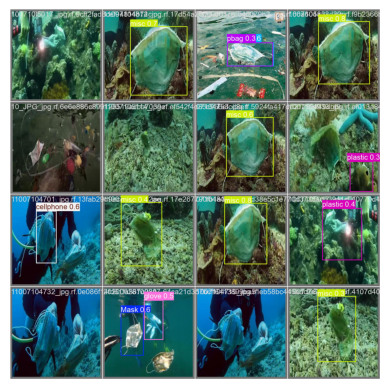

Displaying image: /content/runs/detect/val/val_batch2_labels.jpg


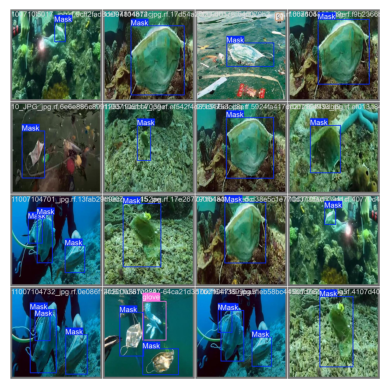

Displaying image: /content/runs/detect/val/val_batch1_pred.jpg


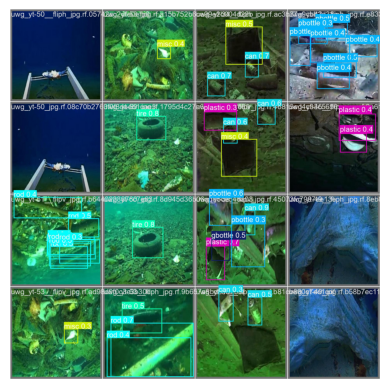

Displaying image: /content/runs/detect/val/val_batch1_labels.jpg


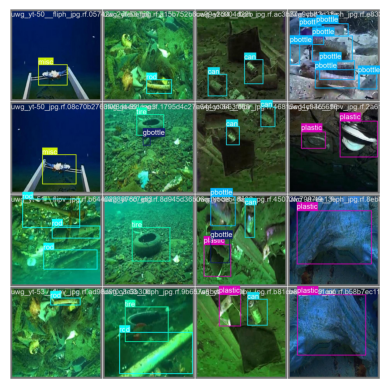

Displaying image: /content/runs/detect/val/val_batch0_labels.jpg


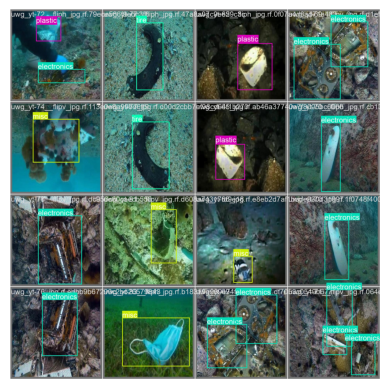

Displaying image: /content/runs/detect/val/confusion_matrix_normalized.png


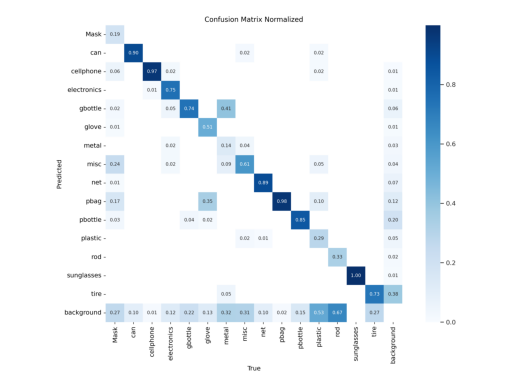

Displaying image: /content/runs/detect/val/R_curve.png


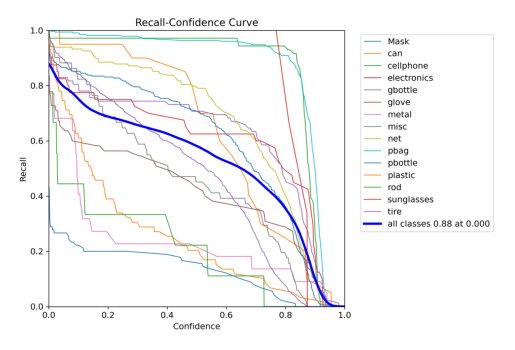

Displaying image: /content/runs/detect/val/PR_curve.png


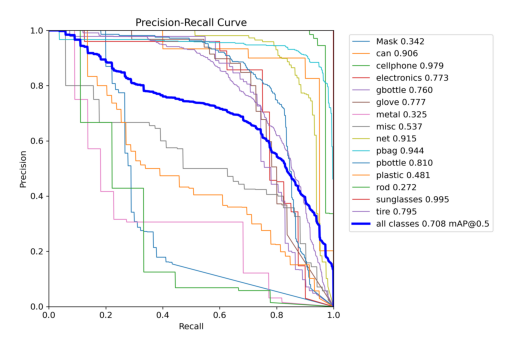

Displaying image: /content/runs/detect/val/confusion_matrix.png


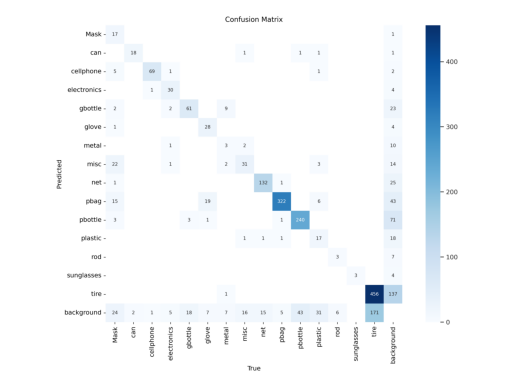

Displaying image: /content/runs/detect/val/F1_curve.png


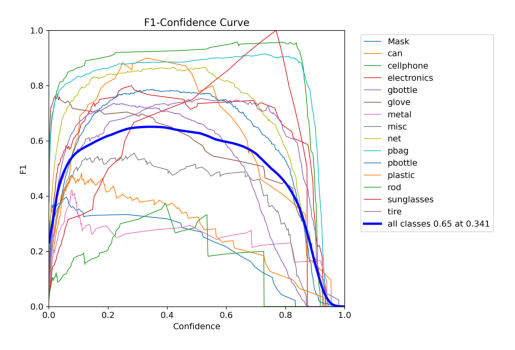

Displaying image: /content/runs/detect/val/P_curve.png


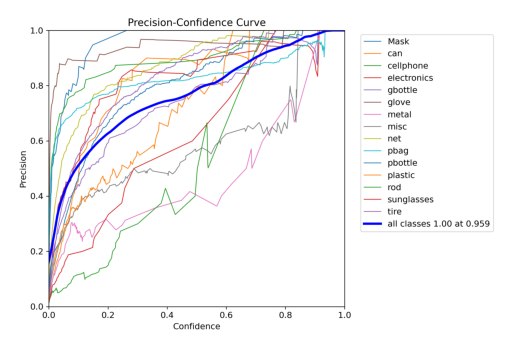

In [ ]:
import os
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the directory
directory = '/content/runs/detect/val'  # Update the path if necessary

# Get a list of all .jpg and .png files in the directory and subdirectories
image_files = glob(os.path.join(directory, '**', '*.jpg'), recursive=True) + \
              glob(os.path.join(directory, '**', '*.png'), recursive=True)

# Iterate through the list of image files and display each one
for image_path in image_files:
    print(f"Displaying image: {image_path}")

    # Read the image
    img = mpimg.imread(image_path)

    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Hide the axis
    plt.show()

In [ ]:
from ultralytics import YOLO
# loading a custom model
model = YOLO('/content/runs/detect/train/weights/best.pt')

In [ ]:
val_res = model.val()

Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/CSE475__LAB_4__TASK-1/valid/labels.cache... 1000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:15<00:00,  4.06it/s]


                   all       1000       1891      0.727      0.644      0.708      0.451
                  Mask         77         90          1      0.193      0.342      0.249
                   can         18         20      0.899      0.893      0.906      0.366
             cellphone         61         71       0.88      0.972      0.979      0.865
           electronics         27         40      0.848      0.698      0.773      0.466
               gbottle         36         82      0.707      0.744       0.76      0.545
                 glove         37         55      0.967       0.53      0.777      0.634
                 metal         10         22      0.352      0.227      0.325      0.195
                  misc         48         51      0.494      0.535      0.537      0.322
                   net        146        148      0.865      0.863      0.915      0.623
                  pbag        290        330      0.814       0.97      0.944      0.821
               pbottl

In [ ]:
val_res.results_dict

{'metrics/precision(B)': 0.7269280885102852,
 'metrics/recall(B)': 0.6435240571256763,
 'metrics/mAP50(B)': 0.7075497294618803,
 'metrics/mAP50-95(B)': 0.45063752472711827,
 'fitness': 0.4763287452005945}

#XAI

In [ ]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import torchvision.transforms as transforms
from PIL import Image
import io

In [ ]:
!pip install ttach

In [ ]:
!git clone https://github.com/rigvedrs/YOLO-V11-CAM.git

Cloning into 'YOLO-V11-CAM'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 115 (delta 13), reused 8 (delta 8), pack-reused 94 (from 1)
Receiving objects: 100% (115/115), 41.00 MiB | 25.96 MiB/s, done.
Resolving deltas: 100% (42/42), done.


In [ ]:
import os

print("Current Directory:", os.getcwd())
os.chdir('./YOLO-V11-CAM')

Current Directory: /content


In [ ]:
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image

In [ ]:
img = cv2.imread('/content/CSE475__LAB_4__TASK-1/test/images/084_split_2_0_jpg.rf.9f326d055da577eb718958c4fd1e940d.jpg')
img = cv2.resize(img, (640, 640))
rgb_img = img.copy()
img = np.float32(img) / 255

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'
